In [32]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.manifold import TSNE
from utils import constants

In [2]:
# results_dir = Path("results") / "vulpi"
# results_dir = Path("results") / "husky"
results_dir = Path("results") / "data_concat"

values = np.load(results_dir / "concat_results_tsne_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_tsne_CNN_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_optim6_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_CNN_hamming_mw_1.7.npy", allow_pickle=True).item()
# values = np.load(results_dir / "results_hamming_aug_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}
values

{'pred': array([0, 0, 0, ..., 8, 8, 8]),
 'true': array([0, 0, 0, ..., 8, 8, 8]),
 'conf': array([[5.7743019e-01, 7.6046803e-07, 8.7177066e-10, ..., 3.7105754e-05,
         3.5332540e-01, 9.3024491e-06],
        [1.0000000e+00, 5.0795765e-17, 6.7371712e-12, ..., 1.0313712e-12,
         3.8497542e-11, 2.0264075e-15],
        [9.9999988e-01, 7.7622546e-18, 8.8254083e-08, ..., 3.8513927e-14,
         2.7219524e-13, 1.5126473e-13],
        ...,
        [5.2274061e-07, 3.4417494e-04, 7.0709639e-06, ..., 2.2570724e-07,
         3.0674605e-04, 9.4341773e-01],
        [2.1051328e-08, 1.4784772e-10, 7.6855620e-04, ..., 1.5019046e-08,
         1.9067379e-06, 9.9922955e-01],
        [3.2849030e-08, 6.1793588e-09, 1.7781821e-06, ..., 1.1982130e-06,
         7.0667179e-06, 9.9998343e-01]], dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'repr': array([[0.        , 0.        , 0.        , ..., 0.27507183, 0.        ,
         0.        ],
        [0.5463566 ,

In [3]:
clf_values = values


# clf_values = values[1700]

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x


ypred = convert_to_int(clf_values["pred"])
ytest = convert_to_int(clf_values["true"])
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'data_concat hamming window')

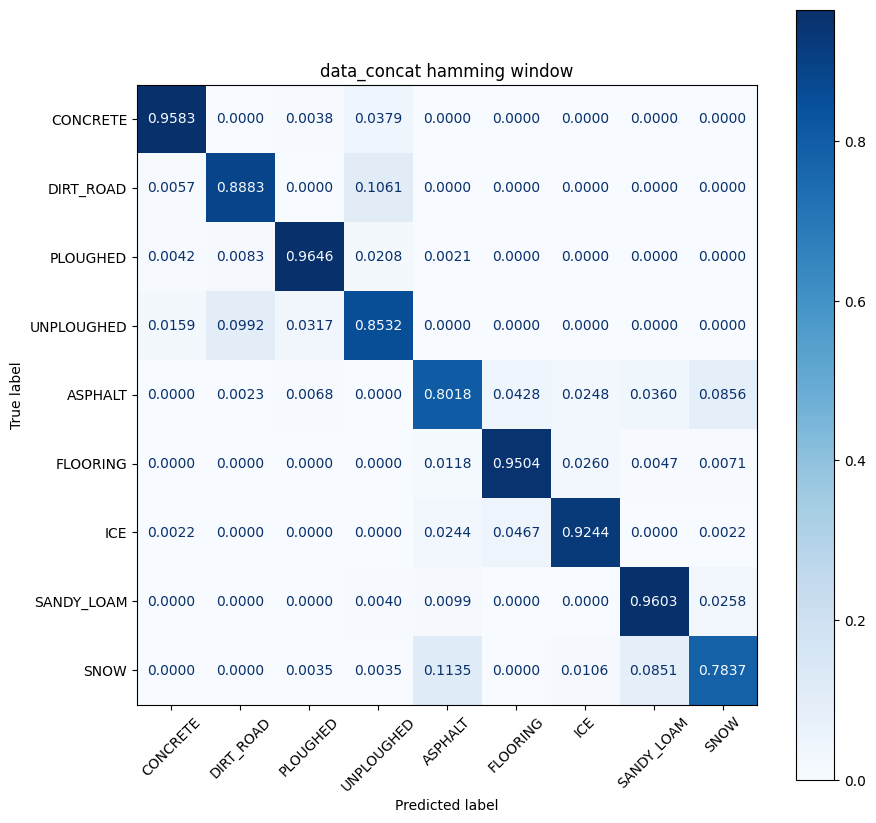

In [4]:
terrains = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED", "ASPHALT", "FLOORING", "ICE", "SANDY_LOAM", "SNOW"]
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')

Text(0.5, 1.0, 'data_concat hamming window')

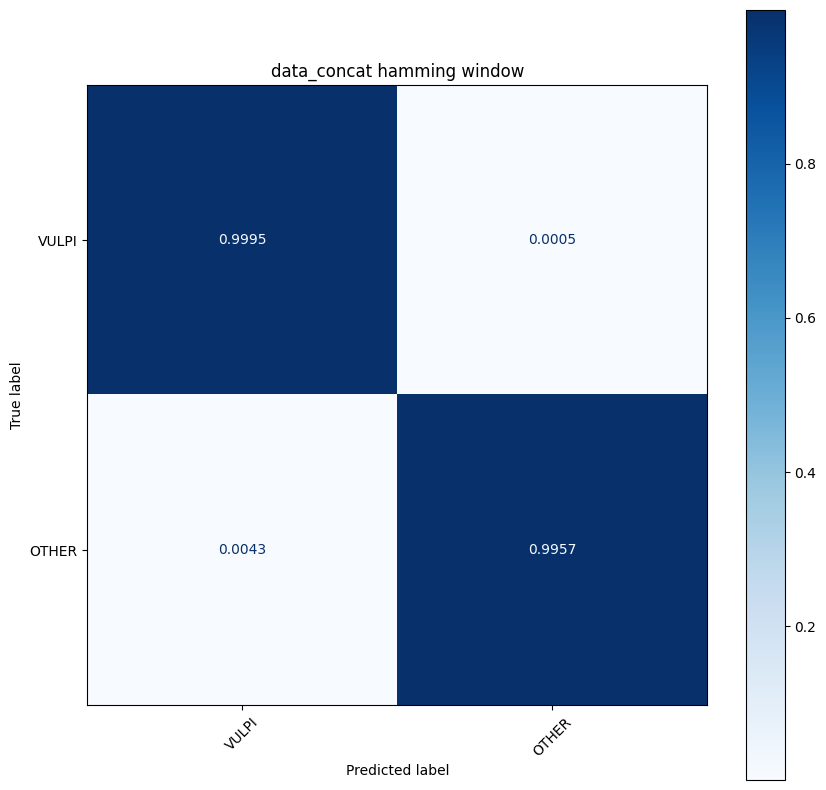

In [5]:
vulpi_terrain = ["CONCRETE", "DIRT_ROAD", "PLOUGHED", "UNPLOUGHED"]
terr_test_bi = np.isin(terr_test, vulpi_terrain)
terr_pred_bi = np.isin(terr_pred, vulpi_terrain)

disp = ConfusionMatrixDisplay.from_predictions(
    terr_test_bi,
    terr_pred_bi,
    labels=[True, False],
    display_labels=['VULPI', 'OTHER'],
    normalize="true",
    values_format=".4f",
    cmap="Blues",
)
fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)
disp.ax_.tick_params(axis='x', rotation=45)
disp.ax_.set_title(results_dir.stem + ' hamming window')


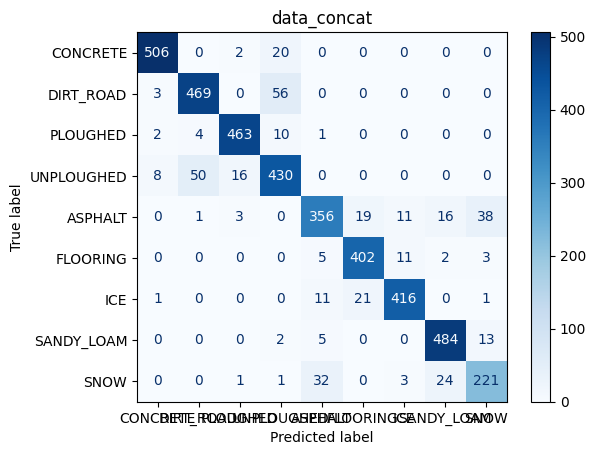

In [6]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)
plt.show()

In [7]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/norlab/code/iros2024/Vulpi2021-terrain-deep-learning/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` 

In [8]:
metrics

accuracy                                          0.904417
precision    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
recall       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
f1-score     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
dtype: object

In [9]:
k = 0

X = clf_values["repr"]
XX = clf_values["repr_train"]
XXX = clf_values["repr_val"]

ytest = convert_to_int(clf_values["true"])
yytest = convert_to_int(clf_values["true_train"])
yyytest = convert_to_int(clf_values["true_val"])

fold_size_x = X.shape[0] // 5
fold_size_xx = XX.shape[0] // 5
fold_size_xxx = XXX.shape[0] // 5

X = X[fold_size_x * k:fold_size_x * (k + 1)]
XX = XX[fold_size_xx * k:fold_size_xx * (k + 1)]
XXX = XXX[fold_size_xxx * k:fold_size_xxx * (k + 1)]
X = np.concatenate([X, XX, XXX], axis=0)
print(X.shape)

ytest = ytest[fold_size_x * k:fold_size_x * (k + 1)]
yytest = yytest[fold_size_xx * k:fold_size_xx * (k + 1)]
yyytest = yyytest[fold_size_xxx * k:fold_size_xxx * (k + 1)]

ytest = np.concatenate([ytest, yytest, yyytest], axis=0)
print(ytest.shape)
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10).fit_transform(X)

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

KeyError: 'repr_train'

In [11]:
from importlib import reload
from utils import constants
reload(constants)

for k in range(5):
    k = 3
    X = clf_values["repr"]
    XX = clf_values["repr_train"]
    XXX = clf_values["repr_val"]

    ytest = convert_to_int(clf_values["true"])
    yytest = convert_to_int(clf_values["true_train"])
    yyytest = convert_to_int(clf_values["true_val"])

    fold_size_x = X.shape[0] // 5
    fold_size_xx = XX.shape[0] // 5
    fold_size_xxx = XXX.shape[0] // 5

    X = X[fold_size_x * k:fold_size_x * (k + 1)]
    XX = XX[fold_size_xx * k:fold_size_xx * (k + 1)]
    XXX = XXX[fold_size_xxx * k:fold_size_xxx * (k + 1)]
    X = np.concatenate([X, XX, XXX], axis=0)
    print(X.shape)

    ytest = ytest[fold_size_x * k:fold_size_x * (k + 1)]
    yytest = yytest[fold_size_xx * k:fold_size_xx * (k + 1)]
    yyytest = yyytest[fold_size_xxx * k:fold_size_xxx * (k + 1)]

    ytest = np.concatenate([ytest, yytest, yyytest], axis=0)
    print(ytest.shape)
    X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10).fit_transform(X)

    for i, terrain in enumerate(terrains):
        c = constants.PLOTCOLORS[terrain.lower().replace("_", " ")]
        marker = '.' if terrain in vulpi_terrain else '.'
        s = 40
        plt.scatter(X_embedded[ytest == i, 0], X_embedded[ytest == i, 1], s, label=terrain, marker=marker, facecolors='white', edgecolors=c, c=c if terrain not in vulpi_terrain else None)
        if results_dir.stem == "vulpi":
            plt.xlim(-30, 40)
            plt.ylim(-30, 30)
        elif results_dir.stem == "husky":
            plt.xlim(-45, 45)
            plt.ylim(-45, 45)
        else:
            plt.xlim(-35, 35)
            plt.ylim(-35, 35)
        plt.plot()

    plt.savefig(f'figs/{results_dir.stem}_{k}_total.pdf')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # ytest
    for i, terrain in enumerate(terrains):
        c = constants.PLOTCOLORS[terrain.lower().replace("_", " ")]
        marker = '.' if terrain in vulpi_terrain else '.'
        s = 40
        plt.scatter(X_embedded[ytest == i, 0], X_embedded[ytest == i, 1], s, label=terrain, marker=marker, c=c)
        if results_dir.stem == "vulpi":
            plt.xlim(-30, 40)
            plt.ylim(-30, 30)
        elif results_dir.stem == "husky":
            plt.xlim(-45, 45)
            plt.ylim(-45, 45)
        else:
            plt.xlim(-35, 35)
            plt.ylim(-35, 35)
        plt.savefig(f'figs/{results_dir.stem}_{k}_{terrain}.pdf')
        print(f'Generated for {terrain}')
        plt.plot()
        plt.show()
    break


KeyError: 'repr_train'

In [9]:
plt.show()

In [16]:
k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size_x = num_pred // 5
X = X[fold_size_x * k:fold_size_x * (k + 1)]
yytest = ytest[fold_size_x * k:fold_size_x * (k + 1)]
X_embedded = TSNE(n_components=3, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)



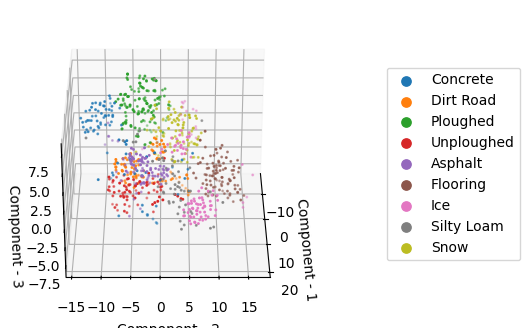

In [37]:
import matplotlib.animation as animation

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(projection='3d')


for i, terrain in enumerate(terrains):
    terr = terrain.replace("_", " ").lower()
    col = constants.PLOTCOLORS[terr]
    lab = terr.replace("sandy", "silty").title()
    ax.scatter(X_embedded[yytest == i, 0], X_embedded[yytest == i, 1], X_embedded[yytest == i, 2], "o", label=lab, s=5, marker='.')

ax.legend(loc='center left', bbox_to_anchor=(1.20, 0.5), markerscale=6)
ax.set_xlabel('Component - 1')
ax.set_ylabel('Component - 2')
ax.set_zlabel('Component - 3')
# ax.show()

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


In [38]:

rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')


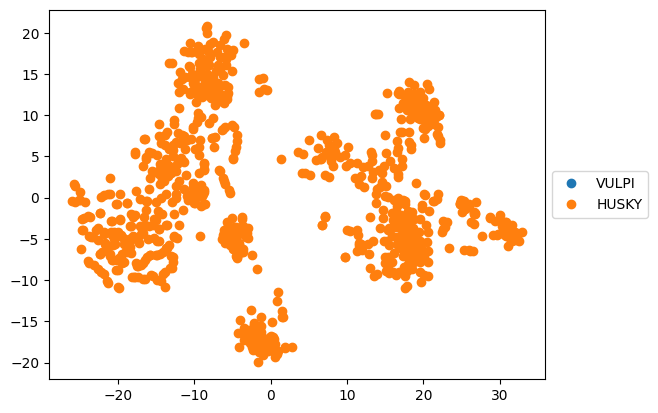

In [13]:
from sklearn.manifold import TSNE

k = 0

X = clf_values["repr"]
num_pred = X.shape[0]
fold_size_x = num_pred // 5
X = X[fold_size_x * k:fold_size_x * (k + 1)]
yytest = ytest[fold_size_x * k:fold_size_x * (k + 1)]
X_embedded = TSNE(n_components=2, perplexity=50, learning_rate=10, n_iter=2000).fit_transform(X)

# ytest
plt.plot(X_embedded[np.isin(yytest, vulpi_terrain), 0], X_embedded[np.isin(yytest, vulpi_terrain), 1], "o", label="VULPI")
plt.plot(X_embedded[~np.isin(yytest, vulpi_terrain), 0], X_embedded[~np.isin(yytest, vulpi_terrain), 1], "o", label="HUSKY")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
